In [1]:
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
import matplotlib.pyplot as plt 

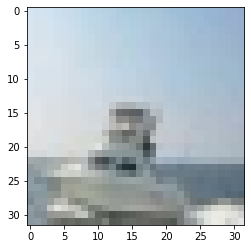

In [9]:
plt.imshow(x_train[100])

In [10]:
#Preprocessing images

In [11]:
#32 by 32 pixels
x_train[0].shape

(32, 32, 3)

In [12]:
x_train.max()

255

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
#labels 

In [16]:
from keras.utils import to_categorical 

In [30]:
y_train.shape

(50000, 10)

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [25]:
y_cat_train = to_categorical(y_train)

In [26]:
y_cat_train[0]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [27]:
y_cat_test = to_categorical(y_test)

In [28]:
# Building the model

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

#First layer of layers

#Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Second layer of layers

#Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten images to change from 2d to 1d
model.add(Flatten())

#Hidden dense layer with 256 neurons
model.add(Dense(256,activation='relu'))

#Last Layer is the classifier 
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [35]:
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 1.5284 - accuracy: 0.4530
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1662 - accuracy: 0.5928
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0132 - accuracy: 0.6482
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9146 - accuracy: 0.6844
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8355 - accuracy: 0.7137
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7821 - accuracy: 0.7346
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7315 - accuracy: 0.7510
Epoch 8/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6927 - accuracy: 0.7661
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6639 - accuracy: 0.7772
Epoch 10/10
1563/1563 [==============================] - 23s 15m

In [36]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.1141 - accuracy: 0.6545


[1.1140787601470947, 0.6545000076293945]

In [50]:
from sklearn.metrics import classification_report

In [46]:
#predictions =model.predict_classes(x_test)
import numpy as np
from numpy import argmax

predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [47]:
predictions

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [48]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.58      0.66      1000
           1       0.88      0.68      0.77      1000
           2       0.62      0.51      0.56      1000
           3       0.55      0.37      0.44      1000
           4       0.58      0.66      0.62      1000
           5       0.51      0.65      0.57      1000
           6       0.56      0.87      0.68      1000
           7       0.77      0.69      0.73      1000
           8       0.67      0.84      0.75      1000
           9       0.78      0.70      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



In [51]:
#larger model 

In [52]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [53]:
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 1.5785 - accuracy: 0.4309
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1556 - accuracy: 0.5949
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9940 - accuracy: 0.6579
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9259 - accuracy: 0.6858
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9013 - accuracy: 0.6978
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8927 - accuracy: 0.7022
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8838 - accuracy: 0.7057
Epoch 8/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8846 - accuracy: 0.7056
Epoch 9/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8710 - accuracy: 0.7134
Epoch 10/10
1563/1563 [==============================] - 76s 49m

In [54]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9979 - accuracy: 0.6628


[0.9978848695755005, 0.6628000140190125]

In [56]:
import numpy as np
from numpy import argmax

predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 9ms/step


In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1000
           1       0.80      0.79      0.80      1000
           2       0.71      0.43      0.54      1000
           3       0.53      0.43      0.48      1000
           4       0.57      0.64      0.60      1000
           5       0.51      0.68      0.58      1000
           6       0.76      0.72      0.74      1000
           7       0.72      0.64      0.68      1000
           8       0.71      0.79      0.75      1000
           9       0.70      0.82      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

